In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from PIL import Image

%matplotlib inline

### Data

Data source: Alice's Adventure in Wonderland by Lewis Carroll 1865, from Gutenburg project
https://gutenberg.org/

In [110]:
ALICE_FILE = 'carroll-alice.txt'
RABBIT = 'rabbit.png'

In [111]:
file = open(ALICE_FILE, 'r')
text = file.read()
text = text.replace('\n', ' ')
text = text.replace('\'', '')
text = text.replace('*', ' ')

In [128]:
nltk.download('punkt')
nltk.download('stopwords')

### Process words - tokenize and remove stopwords
Natural language processing involves extracting information from text for a computer to understand human language. Tokenization is the process of separating words from continuous text and is often a starting point for data analysis.

In [112]:
words = word_tokenize(text.lower())
words = set(words)
stop_words = set(stopwords.words('english'))

filtered_words =[]

for word in words:
    if word not in stop_words:
        filtered_words.append(word)

In [113]:
# Make a sting with filtered word
input_string = ' '.join(filtered_words)

### Apply WordCloud

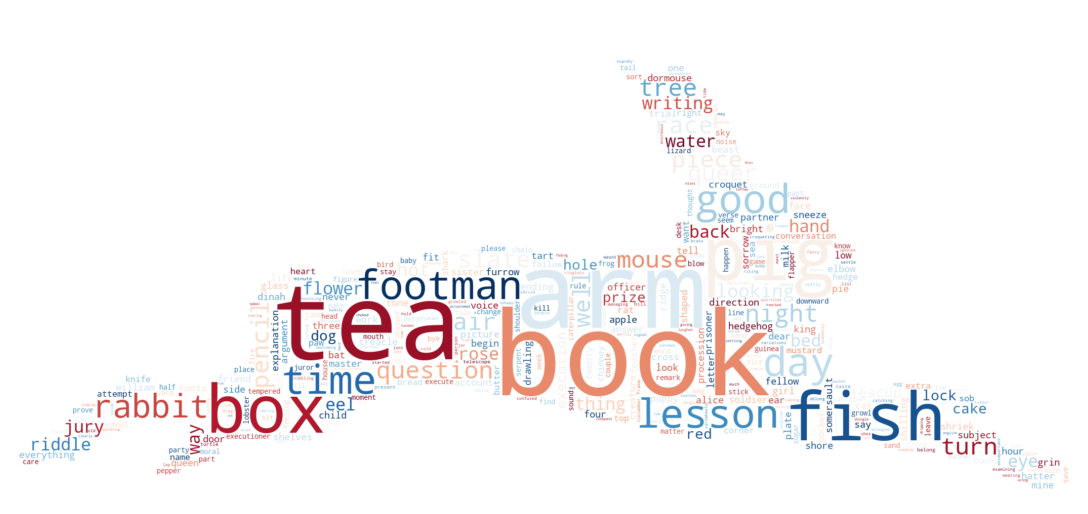

In [135]:
# image and mask 
image = Image.open(RABBIT)
image_mask = Image.new(mode='RGB',
                      size = image.size,
                      color=(255,255,255))
image_mask.paste(image, box=image)
rgb_arr = np.array(image_mask)
plt.figure(figsize=(8, 6), dpi=170)
word_cloud = WordCloud(mask=rgb_arr, 
                      background_color='white',
                      max_words=400,
                      colormap='RdBu')
word_cloud.generate(input_string)
plt.axis('off')
plt.imshow(word_cloud, interpolation='bilinear');